In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
data_loaded = pd.read_hdf('summary.h5')

In [4]:
name_dict = {'parallax  best18k': 'parallax best 18k',
            'properMotion  best18k': 'proper motion best 18k',
            'MicrolensingMetric_detect tE 5_10 days Fraction detected of total (mean)': '5-10d microlensing\ndetection',
            'MicrolensingMetric_detect tE 60_90 days Fraction detected of total (mean)': '60-90d microlensing\ndetection',
            'fO  fONv MedianNvis': 'fO N vis',
            'SNNSNMetric_nSN DDF excluded Total detected': 'SNe, N',
             'SNNSNMetric_zlim DDF excluded Median': 'SNe, zlim',
            #'Total detected TDE_Quality__some_color_pnum  UserPointsSlicer': 'TDE',
            'ExgalM5_with_cuts i band non-DD year 10 3x2ptFoM': '3x2 i-band',
            'WeakLensingNvisits gri band non-DD Median': 'WL Nvis i-band',
            'PrestoKNe__scoreS  Sum': 'KNe Presto S',
            'XRBPopMetric__early_detect  Total detected': 'XRB\nearly detect',
            'Brown Dwarf, L7  VolumeSum': 'Brown Dwarf Vol',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 16.000000': 'NEO bright',
            'Discovery_N_Chances NEO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 22.000000': 'NEO faint',
            'Discovery_N_Chances TNO 3 pairs in 15 nights SNR=3 detection loss CumulativeCompleteness H <= 6.000000': 'TNO'}
invert_cols = ['parallax best 18k', 'proper motion best 18k']
mag_cols = ['5-10d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'CoaddM5 g Median': 'g',
 'CoaddM5 i Median': 'i',
 'CoaddM5 r Median': 'r',
 'CoaddM5 u Median': 'u',
 'CoaddM5 y Median': 'y',
 'CoaddM5 z Median': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    

In [5]:
data

,parallax best 18k,proper motion best 18k,5-10d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe Presto S,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO
start_month_uz_0_v2.99_10yrs,0.792666,0.185683,0.1618,0.4559,795.0,109475.798536,0.293926,38.643260,423.0,200.0,1950.0,168032.537231,0.9326,0.642155,0.722293
start_month_uz_10_v2.99_10yrs,0.796747,0.188265,0.1711,0.4576,795.0,111518.311048,0.295534,38.912595,423.0,177.0,1830.0,167242.520134,0.9320,0.642567,0.722776
start_month_uz_12_v2.99_10yrs,0.799842,0.186291,0.1627,0.4402,795.0,110619.523185,0.295161,38.613679,423.0,195.0,1757.0,168820.715244,0.9326,0.643069,0.722454
start_month_uz_2_v2.99_10yrs,0.797305,0.185046,0.1661,0.4715,797.0,109284.097546,0.294982,38.793246,426.0,196.0,1929.0,168433.341715,0.9350,0.646747,0.723149
start_month_uz_4_v2.99_10yrs,0.799522,0.186518,0.1681,0.4553,794.0,112894.795692,0.300340,39.089253,423.0,189.0,1949.0,170521.923462,0.9278,0.642347,0.725405
start_month_uz_6_v2.99_10yrs,0.795414,0.186199,0.1712,0.4591,799.0,111620.753883,0.300142,39.257158,425.0,191.0,1964.0,169961.494108,0.9282,0.644395,0.723020
start_month_uz_8_v2.99_10yrs,0.795939,0.187887,0.1720,0.4609,798.0,111441.128080,0.297518,38.548833,424.0,186.0,1874.0,167527.079348,0.9324,0.642843,0.722403
start_month_uzy_0_v2.99_10yrs,0.793345,0.185786,0.1657,0.4528,791.0,109885.541234,0.297404,38.730595,421.0,163.0,1946.0,166437.978765,0.9340,0.640307,0.721724
start_month_uzy_10_v2.99_10yrs,0.800404,0.189684,0.1701,0.4631,791.0,111799.071970,0.297788,38.633214,421.0,172.0,1836.0,167888.114513,0.9284,0.640375,0.723397
start_month_uzy_12_v2.99_10yrs,0.799758,0.186415,0.1619,0.4392,790.0,111653.372383,0.298964,38.767888,420.0,160.0,1761.0,168746.489340,0.9300,0.637447,0.722164


In [6]:
mag_data

,g,i,r,u,y,z
start_month_uz_0_v2.99_10yrs,26.688123,26.264600,26.818287,25.668262,24.756955,25.524781
start_month_uz_10_v2.99_10yrs,26.699579,26.266254,26.822514,25.674600,24.764412,25.534515
start_month_uz_12_v2.99_10yrs,26.692523,26.259551,26.815280,25.666252,24.769371,25.535001
start_month_uz_2_v2.99_10yrs,26.689901,26.269975,26.821655,25.665720,24.761281,25.527220
start_month_uz_4_v2.99_10yrs,26.694886,26.283520,26.830849,25.678756,24.782990,25.551103
start_month_uz_6_v2.99_10yrs,26.688718,26.288524,26.833858,25.676148,24.773146,25.548022
start_month_uz_8_v2.99_10yrs,26.692286,26.274030,26.820569,25.679650,24.767225,25.540629
start_month_uzy_0_v2.99_10yrs,26.691067,26.266481,26.796821,25.671016,24.742600,25.536234
start_month_uzy_10_v2.99_10yrs,26.694914,26.263903,26.804285,25.677789,24.756447,25.539534
start_month_uzy_12_v2.99_10yrs,26.685147,26.266649,26.798182,25.661912,24.760180,25.547986


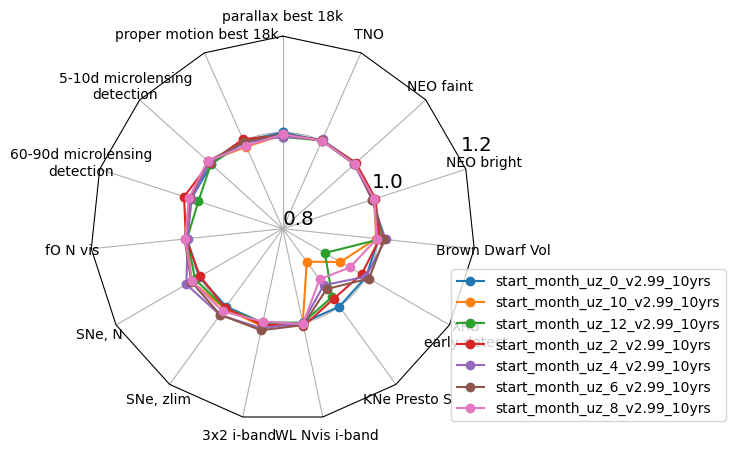

In [9]:
runs = [run for run in data.index if '_uz_' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='start_month_uz_0_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

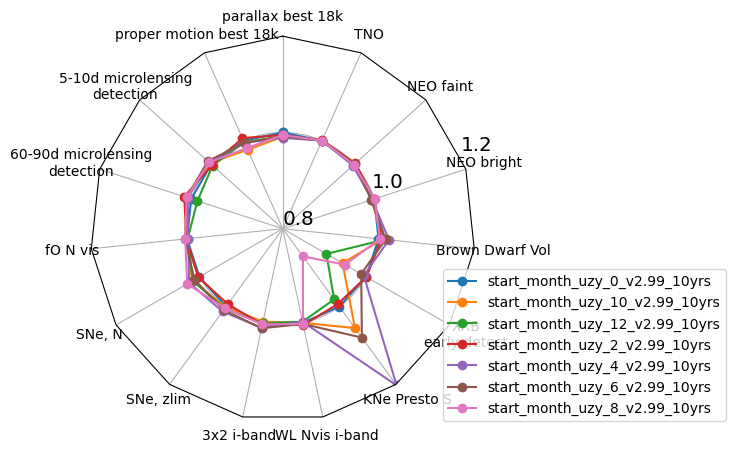

In [11]:
runs = [run for run in data.index if '_uzy_' in run]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='start_month_uzy_0_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

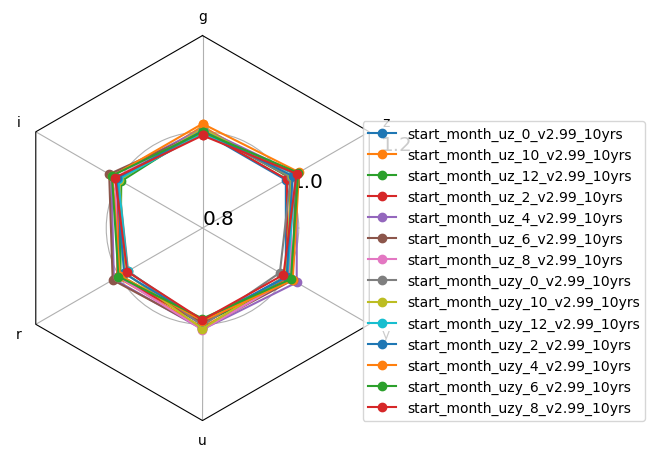

In [8]:
ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='start_month_uz_0_v2.99_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [17]:
[col for col in data_loaded.columns if 'DD' in col and 'NVisits all bands Median' in col]

['DD:COSMOS NVisits all bands Median',
 'DD:ECDFS NVisits all bands Median',
 'DD:EDFS NVisits all bands Median',
 'DD:ELAISS1 NVisits all bands Median',
 'DD:WFD NVisits all bands Median',
 'DD:XMM_LSS NVisits all bands Median']

In [18]:
data_loaded['DD:ELAISS1 NVisits all bands Median']

start_month_uz_0_v2.99_10yrs      10671.0
start_month_uz_10_v2.99_10yrs     10412.0
start_month_uz_12_v2.99_10yrs     10441.0
start_month_uz_2_v2.99_10yrs      10852.0
start_month_uz_4_v2.99_10yrs      10013.0
start_month_uz_6_v2.99_10yrs      10139.0
start_month_uz_8_v2.99_10yrs       9936.0
start_month_uzy_0_v2.99_10yrs     11466.0
start_month_uzy_10_v2.99_10yrs    11274.0
start_month_uzy_12_v2.99_10yrs    11181.0
start_month_uzy_2_v2.99_10yrs     11597.0
start_month_uzy_4_v2.99_10yrs     10855.0
start_month_uzy_6_v2.99_10yrs     10968.0
start_month_uzy_8_v2.99_10yrs     10779.0
Name: DD:ELAISS1 NVisits all bands Median, dtype: float64

In [19]:
data_loaded['DD:COSMOS NVisits all bands Median']


start_month_uz_0_v2.99_10yrs      18716.5
start_month_uz_10_v2.99_10yrs     18653.5
start_month_uz_12_v2.99_10yrs     18897.5
start_month_uz_2_v2.99_10yrs      18841.0
start_month_uz_4_v2.99_10yrs      18909.5
start_month_uz_6_v2.99_10yrs      19137.5
start_month_uz_8_v2.99_10yrs      19140.0
start_month_uzy_0_v2.99_10yrs     20739.5
start_month_uzy_10_v2.99_10yrs    20674.5
start_month_uzy_12_v2.99_10yrs    20767.0
start_month_uzy_2_v2.99_10yrs     20867.0
start_month_uzy_4_v2.99_10yrs     20870.0
start_month_uzy_6_v2.99_10yrs     21053.5
start_month_uzy_8_v2.99_10yrs     20982.0
Name: DD:COSMOS NVisits all bands Median, dtype: float64